In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection  import train_test_split, cross_val_score, KFold
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, plot_confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import StratifiedKFold
#algorithms for sampling
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE

from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingRandomSearchCV

from sklearn import metrics
from sklearn.metrics import cohen_kappa_score

import datetime as dt
import seaborn as sns
import joblib
import re


In [ ]:
data_dir = '/content/drive/MyDrive/Colab Notebooks/cred/'

In [ ]:
df_train = pd.read_csv('/content/drive/MyDrive/fraudTrain.csv')
df_test = pd.read_csv('/content/drive/MyDrive/fraudTrain.csv')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df_test['is_fraud'].value_counts()

0    1289169
1       7506
Name: is_fraud, dtype: int64

In [ ]:
dataFrame = pd.concat([df_train,df_test],ignore_index=True)
dataFrame[dataFrame['is_fraud'] ==1]

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
2449,2449,2019-01-02 01:06:37,4613314721966,fraud_Rutherford-Mertz,grocery_pos,281.06,Jason,Murphy,M,542 Steve Curve Suite 011,...,35.9946,-81.7266,885,Soil scientist,1988-09-15,e8a81877ae9a0a7f883e15cb39dc4022,1325466397,36.430124,-81.179483,1
2472,2472,2019-01-02 01:47:29,340187018810220,"fraud_Jenkins, Hauck and Friesen",gas_transport,11.52,Misty,Hart,F,27954 Hall Mill Suite 575,...,29.4400,-98.4590,1595797,Horticultural consultant,1960-10-28,bc7d41c41103877b03232f03f1f8d3f5,1325468849,29.819364,-99.142791,1
2523,2523,2019-01-02 03:05:23,340187018810220,fraud_Goodwin-Nitzsche,grocery_pos,276.31,Misty,Hart,F,27954 Hall Mill Suite 575,...,29.4400,-98.4590,1595797,Horticultural consultant,1960-10-28,b98f12f4168391b2203238813df5aa8c,1325473523,29.273085,-98.836360,1
2546,2546,2019-01-02 03:38:03,4613314721966,fraud_Erdman-Kertzmann,gas_transport,7.03,Jason,Murphy,M,542 Steve Curve Suite 011,...,35.9946,-81.7266,885,Soil scientist,1988-09-15,397894a5c4c02e3c61c784001f0f14e4,1325475483,35.909292,-82.091010,1
2553,2553,2019-01-02 03:55:47,340187018810220,fraud_Koepp-Parker,grocery_pos,275.73,Misty,Hart,F,27954 Hall Mill Suite 575,...,29.4400,-98.4590,1595797,Horticultural consultant,1960-10-28,7863235a750d73a244c07f1fb7f0185a,1325476547,29.786426,-98.683410,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2592074,1295399,2020-06-21 01:00:08,3524574586339330,fraud_Kassulke PLC,shopping_net,977.01,Ashley,Cabrera,F,94225 Smith Springs Apt. 617,...,27.6330,-80.4031,105638,"Librarian, public",1986-05-07,a83b093f0c1d9068fa0089f7c722615f,1371776408,26.888686,-80.834389,1
2592166,1295491,2020-06-21 01:53:35,3524574586339330,fraud_Schumm PLC,shopping_net,1210.91,Ashley,Cabrera,F,94225 Smith Springs Apt. 617,...,27.6330,-80.4031,105638,"Librarian, public",1986-05-07,f75b35bed13b9e692f170dba45a15b21,1371779615,28.216707,-79.855648,1
2592207,1295532,2020-06-21 02:16:56,4005676619255478,"fraud_Tillman, Dickinson and Labadie",gas_transport,10.24,William,Perry,M,458 Phillips Island Apt. 768,...,30.4590,-90.9027,71335,Herbalist,1994-05-31,a0ba2472cd3fc9731f2a18d3f308f5c3,1371781016,29.700456,-91.361632,1
2592341,1295666,2020-06-21 03:26:20,3560725013359375,fraud_Corwin-Collins,gas_transport,21.69,Brooke,Smith,F,63542 Luna Brook Apt. 012,...,31.8599,-102.7413,23,Cytogeneticist,1969-09-15,daa281350b1e16093c7b4bf97bf4d6ed,1371785180,32.675272,-103.484949,1


In [ ]:
dataFrame.shape

(2593350, 23)

In [ ]:
dataFrame.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [ ]:
dataFrame.isnull().values.any(), dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2593350 entries, 0 to 2593349
Data columns (total 23 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Unnamed: 0             int64  
 1   trans_date_trans_time  object 
 2   cc_num                 int64  
 3   merchant               object 
 4   category               object 
 5   amt                    float64
 6   first                  object 
 7   last                   object 
 8   gender                 object 
 9   street                 object 
 10  city                   object 
 11  state                  object 
 12  zip                    int64  
 13  lat                    float64
 14  long                   float64
 15  city_pop               int64  
 16  job                    object 
 17  dob                    object 
 18  trans_num              object 
 19  unix_time              int64  
 20  merch_lat              float64
 21  merch_long             float64
 22  is_fraud          

(False, None)

In [ ]:
1296675 * 100 / (1296675 + 555719)

69.99995681264353

Fraud Distribution
0    0.994211
1    0.005789
Name: is_fraud, dtype: float64


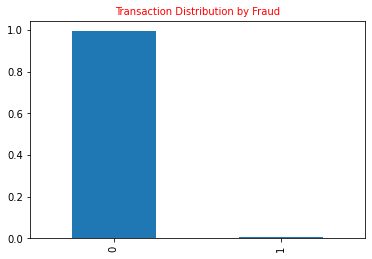

In [ ]:
print ('Fraud Distribution')
print (dataFrame.is_fraud.value_counts(normalize=True))
plt.title('Transaction Distribution by Fraud', fontsize= 10, color = 'Red', fontweight = 100)
dataFrame.is_fraud.value_counts(normalize=True).plot.bar()
plt.show()

In [ ]:
dataFrame.drop(['cc_num', 'first', 'last', 'street', 'trans_num', 'zip', 'lat', 'long', 'city_pop', 'unix_time', 'merch_lat','merch_long'], axis=1, inplace=True)
dataFrame.drop(dataFrame.iloc[:,[0]], axis=1, inplace=True)

In [ ]:
dataFrame

,trans_date_trans_time,merchant,category,amt,gender,city,state,job,dob,is_fraud
0,2019-01-01 00:00:18,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,Moravian Falls,NC,"Psychologist, counselling",1988-03-09,0
1,2019-01-01 00:00:44,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,Orient,WA,Special educational needs teacher,1978-06-21,0
2,2019-01-01 00:00:51,fraud_Lind-Buckridge,entertainment,220.11,M,Malad City,ID,Nature conservation officer,1962-01-19,0
3,2019-01-01 00:01:16,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,Boulder,MT,Patent attorney,1967-01-12,0
4,2019-01-01 00:03:06,fraud_Keeling-Crist,misc_pos,41.96,M,Doe Hill,VA,Dance movement psychotherapist,1986-03-28,0
...,...,...,...,...,...,...,...,...,...,...
2593345,2020-06-21 12:12:08,fraud_Reichel Inc,entertainment,15.56,M,Hatch,UT,Geoscientist,1961-11-24,0
2593346,2020-06-21 12:12:19,fraud_Abernathy and Sons,food_dining,51.70,M,Tuscarora,MD,"Production assistant, television",1979-12-11,0
2593347,2020-06-21 12:12:32,fraud_Stiedemann Ltd,food_dining,105.93,M,High Rolls Mountain Park,NM,Naval architect,1967-08-30,0
2593348,2020-06-21 12:13:36,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,M,Manderson,SD,Volunteer coordinator,1980-08-18,0


In [ ]:
dataFrame['dob'] = pd.to_datetime(dataFrame['dob'])
dataFrame['age'] = (pd.to_datetime('now') - dataFrame['dob'])/ np.timedelta64(1, 'Y')
dataFrame['age'] = dataFrame['age'].astype(int)
dataFrame.drop(['dob'], axis=1, inplace=True)
dataFrame


dataFrame['trans_date'] = pd.DatetimeIndex(dataFrame['trans_date_trans_time']).date
dataFrame['trans_time'] = pd.DatetimeIndex(dataFrame['trans_date_trans_time']).time
dataFrame.drop(['trans_date_trans_time'], axis=1, inplace=True)
dataFrame.head()

,merchant,category,amt,gender,city,state,job,is_fraud,age,trans_date,trans_time
0,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,Moravian Falls,NC,"Psychologist, counselling",0,34,2019-01-01,00:00:18
1,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,Orient,WA,Special educational needs teacher,0,44,2019-01-01,00:00:44
2,fraud_Lind-Buckridge,entertainment,220.11,M,Malad City,ID,Nature conservation officer,0,60,2019-01-01,00:00:51
3,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,Boulder,MT,Patent attorney,0,55,2019-01-01,00:01:16
4,fraud_Keeling-Crist,misc_pos,41.96,M,Doe Hill,VA,Dance movement psychotherapist,0,36,2019-01-01,00:03:06


In [ ]:
dataFrame.describe()

,amt,is_fraud,age
count,2.593350e+06,2.593350e+06,2.593350e+06
mean,7.035104e+01,5.788652e-03,4.829300e+01
std,1.603160e+02,7.586268e-02,1.739244e+01
min,1.000000e+00,0.000000e+00,1.700000e+01
25%,9.650000e+00,0.000000e+00,3.500000e+01
50%,4.752000e+01,0.000000e+00,4.600000e+01
75%,8.314000e+01,0.000000e+00,5.900000e+01
max,2.894890e+04,1.000000e+00,9.700000e+01


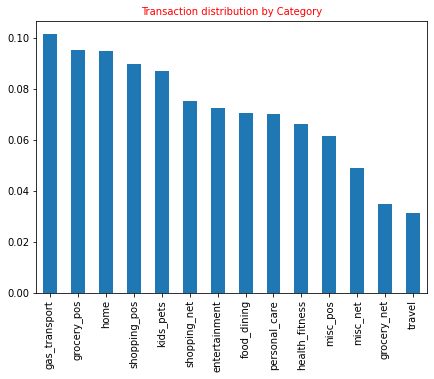

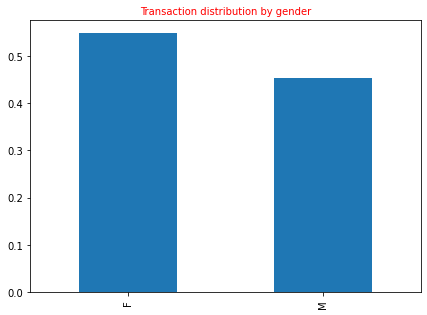

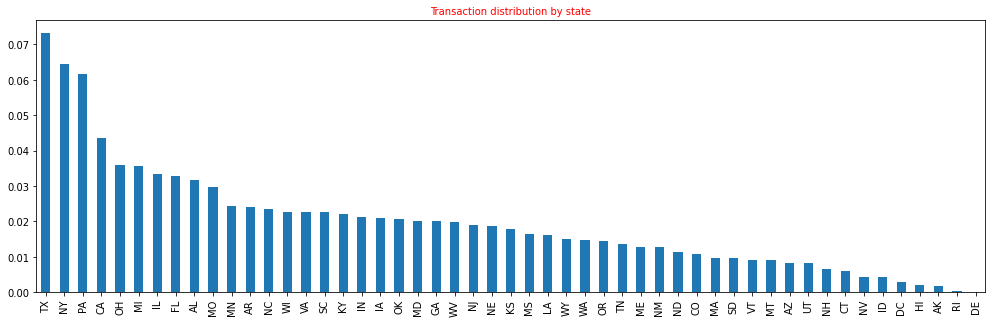

In [ ]:
plt.figure(figsize = (7,5))
plt.title('Transaction distribution by Category', fontsize= 10, color = 'Red', fontweight = 100)
dataFrame.category.value_counts(normalize=True).plot.bar()
plt.show()

plt.figure(figsize = (7,5))
plt.title('Transaction distribution by gender', fontsize= 10, color = 'Red', fontweight = 100)
dataFrame.gender.value_counts(normalize=True).plot.bar()
plt.show()

plt.figure(figsize = (17,5))
plt.title('Transaction distribution by state', fontsize= 10, color = 'Red', fontweight = 100)
dataFrame.state.value_counts(normalize=True).plot.bar()
plt.show()

In [ ]:
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2593350 entries, 0 to 2593349
Data columns (total 11 columns):
 #   Column      Dtype  
---  ------      -----  
 0   merchant    object 
 1   category    object 
 2   amt         float64
 3   gender      object 
 4   city        object 
 5   state       object 
 6   job         object 
 7   is_fraud    int64  
 8   age         int64  
 9   trans_date  object 
 10  trans_time  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 217.6+ MB


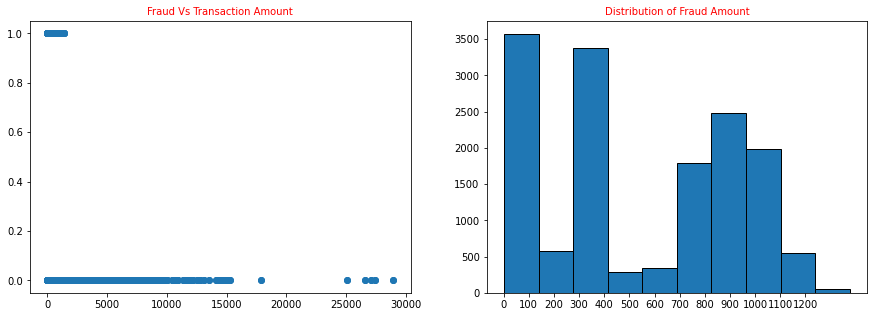

In [ ]:
plt.figure(figsize=[15,5])
plt.subplot(1,2,1)
plt.title('Fraud Vs Transaction Amount', fontsize= 10, color = 'Red', fontweight = 100)
plt.scatter(dataFrame.amt, dataFrame.is_fraud)
plt.subplot(1,2,2)

temp = dataFrame[dataFrame.is_fraud == 1]
plt.title('Distribution of Fraud Amount', fontsize= 10, color = 'Red', fontweight = 100)
plt.hist(temp.amt, edgecolor='Black')
plt.xticks(np.arange(0, 1300, step=100))

plt.show()

In [ ]:
merch_tran_total = dataFrame.sort_values('merchant').groupby('merchant').count()['is_fraud']
merch_tran_total.head()

merchant
fraud_Abbott-Rogahn                 3688
fraud_Abbott-Steuber                3526
fraud_Abernathy and Sons            3502
fraud_Abshire PLC                   3790
fraud_Adams, Kovacek and Kuhlman    1880
Name: is_fraud, dtype: int64

In [ ]:
merch_tran_fraud = dataFrame[dataFrame.is_fraud == 1]['merchant'].value_counts()
merch_tran_fraud.head()

fraud_Rau and Sons       98
fraud_Cormier LLC        96
fraud_Kozey-Boehm        96
fraud_Doyle Ltd          94
fraud_Vandervort-Funk    94
Name: merchant, dtype: int64

In [ ]:
fraud_perc = merch_tran_fraud/ merch_tran_total * 100
fraud_perc.sort_values(ascending=False)

fraud_Kozey-Boehm                        2.572347
fraud_Herman, Treutel and Dickens        2.538462
fraud_Kerluke-Abshire                    2.230686
fraud_Brown PLC                          2.210884
fraud_Goyette Inc                        2.161606
                                           ...   
fraud_Ritchie, Bradtke and Stiedemann         NaN
fraud_Romaguera and Sons                      NaN
fraud_Schroeder Group                         NaN
fraud_Schroeder, Wolff and Hermiston          NaN
fraud_Wiegand-Lowe                            NaN
Length: 693, dtype: float64

In [ ]:
label_encoder = LabelEncoder()
dataFrame.merchant = label_encoder.fit_transform(dataFrame.merchant)
dataFrame['merchant']

0          514
1          241
2          390
3          360
4          297
          ... 
2593345    499
2593346      2
2593347    599
2593348    509
2593349    370
Name: merchant, Length: 2593350, dtype: int64

In [ ]:
city_tran_total = dataFrame.sort_values('city').groupby('city').count()['is_fraud']
city_tran_fraud = dataFrame[dataFrame.is_fraud == 1]['city'].value_counts()
fraud_perc = city_tran_fraud/ city_tran_total * 100
fraud_perc.sort_values(ascending=False).head(20)

232    100.0
834    100.0
274    100.0
278    100.0
293    100.0
610    100.0
305    100.0
57     100.0
836    100.0
570    100.0
838    100.0
106    100.0
844    100.0
599    100.0
580    100.0
575    100.0
640    100.0
649    100.0
673    100.0
689    100.0
dtype: float64

In [ ]:
dataFrame.city = label_encoder.fit_transform(dataFrame.city)

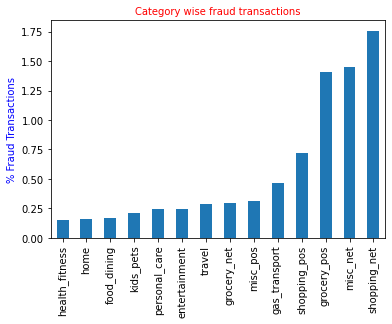

entertainment     0.247835
food_dining       0.165098
gas_transport     0.469394
grocery_net       0.294817
grocery_pos       1.409761
health_fitness    0.154869
home              0.160825
kids_pets         0.211439
misc_net          1.445795
misc_pos          0.313853
personal_care     0.242403
shopping_net      1.756149
shopping_pos      0.722538
travel            0.286370
dtype: float64

In [ ]:
cat_tran_total = dataFrame.sort_values('category').groupby('category').count()['is_fraud']
cat_tran_fraud = dataFrame[dataFrame.is_fraud == 1]['category'].value_counts()
fraud_perc = cat_tran_fraud/ cat_tran_total * 100
plt.title('Category wise fraud transactions', fontsize= 10, color = 'Red', fontweight = 100)
plt.ylabel('% Fraud Transactions', fontdict = {'fontsize': 10, 'color': 'Blue', 'fontweight' : '300'})
fraud_perc.sort_values().plot.bar()
plt.show()
fraud_perc

In [ ]:
dataFrame.category = label_encoder.fit_transform(dataFrame.category)

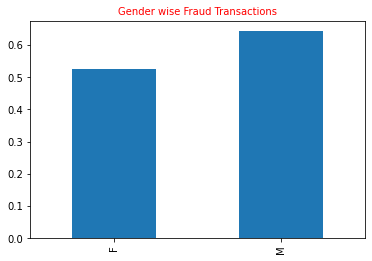

In [ ]:
gen_tran_total = dataFrame.sort_values('gender').groupby('gender').count()['is_fraud']
gen_tran_fraud = dataFrame[dataFrame.is_fraud == 1]['gender'].value_counts()
fraud_perc = gen_tran_fraud/ gen_tran_total * 100
plt.title('Gender wise Fraud Transactions', fontsize= 10, color = 'Red', fontweight = 100)
fraud_perc.sort_values().plot.bar()
plt.show()

In [ ]:
dataFrame.gender = dataFrame.gender.map({'M': 1, "F": 0})

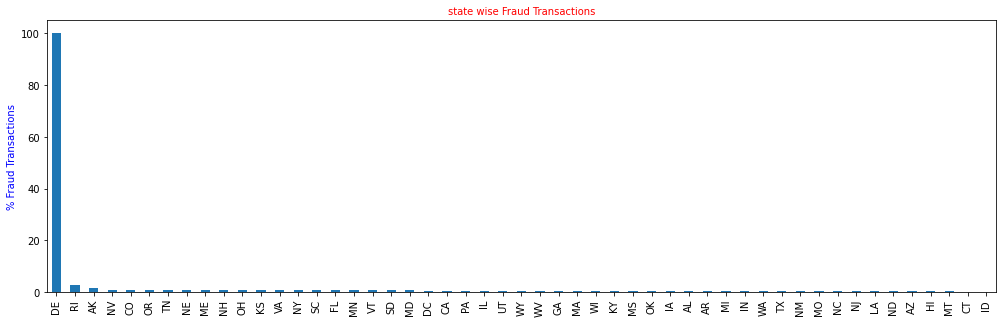

AK      1.698113
AL      0.524531
AR      0.517236
AZ      0.343547
CA      0.578424
CO      0.814121
CT      0.207738
DC      0.581234
DE    100.000000
FL      0.658527
GA      0.560181
HI      0.273544
IA      0.526218
ID      0.198377
IL      0.573384
IN      0.514866
KS      0.678379
KY      0.544337
LA      0.434057
MA      0.557531
MD      0.599397
ME      0.720994
MI      0.515665
MN      0.652709
MO      0.497357
MS      0.542760
MT      0.272248
NC      0.492302
ND      0.385500
NE      0.744786
NH      0.712733
NJ      0.479616
NM      0.499787
NV      0.838238
NY      0.664663
OH      0.690620
OK      0.536163
OR      0.801204
PA      0.573597
RI      2.727273
SC      0.661185
SD      0.600454
TN      0.797539
TX      0.504870
UT      0.570147
VA      0.676923
VT      0.611829
WA      0.507292
WI      0.555026
WV      0.568292
WY      0.569299
dtype: float64

In [ ]:
plt.figure(figsize = (17,5))
state_tran_total = dataFrame.sort_values('state').groupby('state').count()['is_fraud']
state_tran_fraud = dataFrame[dataFrame.is_fraud == 1]['state'].value_counts()
fraud_perc = state_tran_fraud/ state_tran_total * 100
plt.title('state wise Fraud Transactions', fontsize= 10, color = 'Red', fontweight = 100)
plt.ylabel('% Fraud Transactions', fontdict = {'fontsize': 10, 'color': 'Blue', 'fontweight' : '300'})
fraud_perc.sort_values(ascending=False).plot.bar()
plt.show()
fraud_perc

In [ ]:
dataFrame.state = label_encoder.fit_transform(dataFrame.state)

In [ ]:
job_tran_total = dataFrame.sort_values('job').groupby('job').count()['is_fraud']
job_tran_fraud = dataFrame[dataFrame.is_fraud == 1]['job'].value_counts()
fraud_perc = job_tran_fraud/ job_tran_total * 100
fraud_perc.sort_values(ascending=False).head(30)

Armed forces technical officer       100.000000
Engineer, site                       100.000000
Information officer                  100.000000
Legal secretary                      100.000000
Industrial buyer                     100.000000
Careers adviser                      100.000000
Homeopath                            100.000000
Broadcast journalist                 100.000000
Personnel officer                    100.000000
Forest/woodland manager              100.000000
Sales promotion account executive    100.000000
Air traffic controller               100.000000
Contracting civil engineer           100.000000
Ship broker                          100.000000
Solicitor                            100.000000
Accountant, chartered                100.000000
Dancer                               100.000000
Warehouse manager                    100.000000
Veterinary surgeon                   100.000000
Lawyer                                 5.185185
TEFL teacher                           4

In [ ]:
dataFrame.job = label_encoder.fit_transform(dataFrame.job)

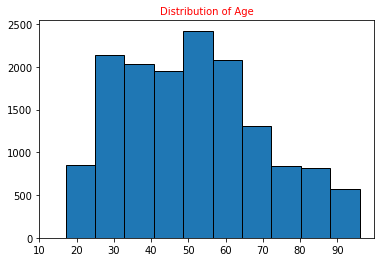

In [ ]:
temp = dataFrame[dataFrame.is_fraud == 1]
plt.title('Distribution of Age', fontsize= 10, color = 'Red', fontweight = 100)
plt.hist(temp.age, edgecolor='Black')
plt.xticks(np.arange(10, 100, step=10))
plt.show()

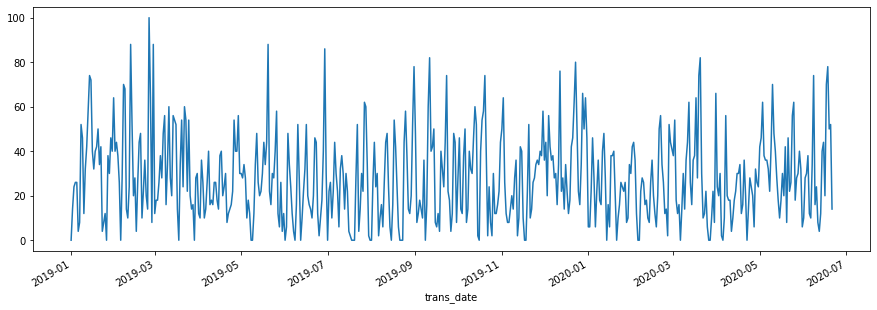

In [ ]:
dataFrame['trans_date'] =  pd.to_datetime(dataFrame['trans_date'])
plt.figure(figsize=[15,5])
dataFrame.groupby(['trans_date'])['is_fraud'].sum().plot()
plt.show()

In [ ]:
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2593350 entries, 0 to 2593349
Data columns (total 11 columns):
 #   Column      Dtype         
---  ------      -----         
 0   merchant    int64         
 1   category    int64         
 2   amt         float64       
 3   gender      int64         
 4   city        int64         
 5   state       int64         
 6   job         int64         
 7   is_fraud    int64         
 8   age         int64         
 9   trans_date  datetime64[ns]
 10  trans_time  object        
dtypes: datetime64[ns](1), float64(1), int64(8), object(1)
memory usage: 217.6+ MB


In [ ]:
dataFrame['trans_date'] =  pd.to_datetime(dataFrame['trans_date'])
dataFrame.trans_date = dataFrame.trans_date.map(dt.datetime.toordinal)
dataFrame.trans_time = pd.to_datetime(dataFrame.trans_time,format='%H:%M:%S')
dataFrame.trans_time = 3600 * pd.DatetimeIndex(dataFrame.trans_time).hour + 60 * pd.DatetimeIndex(dataFrame.trans_time).minute + pd.DatetimeIndex(dataFrame.trans_time).second

In [ ]:
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2593350 entries, 0 to 2593349
Data columns (total 11 columns):
 #   Column      Dtype  
---  ------      -----  
 0   merchant    int64  
 1   category    int64  
 2   amt         float64
 3   gender      int64  
 4   city        int64  
 5   state       int64  
 6   job         int64  
 7   is_fraud    int64  
 8   age         int64  
 9   trans_date  int64  
 10  trans_time  int64  
dtypes: float64(1), int64(10)
memory usage: 217.6 MB


In [ ]:
not_fraud=len(dataFrame[dataFrame.is_fraud==0])
fraud=len(dataFrame[dataFrame.is_fraud==1])
percentage=fraud/(fraud+not_fraud)*100
print('fraudcard',fraud)
print('notfraudcard',not_fraud)
print('percentage of fraud cards',percentage)

fraudcard 15012
notfraudcard 2578338
percentage of fraud cards 0.5788651743883394


### Implementing Decision Tree algorithm

In [ ]:
#storing the number of values in each class
non_fraud_count, fraud_count = dataFrame.is_fraud.value_counts()

In [ ]:
#storing the numerical columns of the data and removing unnecessary variables
df_num = dataFrame.select_dtypes(include='number')
df_num.columns

Index(['merchant', 'category', 'amt', 'gender', 'city', 'state', 'job',
       'is_fraud', 'age', 'trans_date', 'trans_time'],
      dtype='object')

In [ ]:
df_num

,merchant,category,amt,gender,city,state,job,is_fraud,age,trans_date,trans_time
0,514,8,4.97,0,526,27,370,0,34,737060,18
1,241,4,107.23,0,612,47,428,0,44,737060,44
2,390,0,220.11,1,468,13,307,0,60,737060,51
3,360,2,45.00,1,84,26,328,0,55,737060,76
4,297,9,41.96,1,216,45,116,0,36,737060,186
...,...,...,...,...,...,...,...,...,...,...,...
2593345,499,0,15.56,1,330,44,215,0,60,737597,43928
2593346,2,1,51.70,1,813,20,360,0,42,737597,43939
2593347,599,1,105.93,1,346,32,308,0,54,737597,43952
2593348,509,1,74.90,1,471,41,485,0,41,737597,44016


In [ ]:
df_num.describe()

,merchant,category,amt,gender,city,state,job,is_fraud,age,trans_date,trans_time
count,2.593350e+06,2.593350e+06,2.593350e+06,2.593350e+06,2.593350e+06,2.593350e+06,2.593350e+06,2.593350e+06,2.593350e+06,2.593350e+06,2.593350e+06
mean,3.428585e+02,6.227787e+00,7.035104e+01,4.525513e-01,4.452633e+02,2.667728e+01,2.511734e+02,5.788652e-03,4.829300e+01,7.373350e+05,4.789671e+04
std,2.009519e+02,3.913442e+00,1.603160e+02,4.977436e-01,2.586001e+02,1.433098e+01,1.401093e+02,7.586268e-02,1.739244e+01,1.487899e+02,2.456550e+04
min,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.700000e+01,7.370600e+05,0.000000e+00
25%,1.650000e+02,3.000000e+00,9.650000e+00,0.000000e+00,2.240000e+02,1.500000e+01,1.310000e+02,0.000000e+00,3.500000e+01,7.372130e+05,2.749925e+04
50%,3.460000e+02,6.000000e+00,4.752000e+01,0.000000e+00,4.390000e+02,2.800000e+01,2.510000e+02,0.000000e+00,4.600000e+01,7.373350e+05,5.091800e+04
75%,5.140000e+02,1.000000e+01,8.314000e+01,1.000000e+00,6.770000e+02,3.800000e+01,3.740000e+02,0.000000e+00,5.900000e+01,7.374520e+05,6.873400e+04
max,6.920000e+02,1.300000e+01,2.894890e+04,1.000000e+00,8.930000e+02,5.000000e+01,4.930000e+02,1.000000e+00,9.700000e+01,7.375970e+05,8.639900e+04


In [ ]:
#innput-output split
X = df_num.drop(['is_fraud'],axis=1)
y = df_num.is_fraud

In [ ]:
#scaling
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
#train-test split using stratified K fold
skf = StratifiedKFold(n_splits=2)
skf.get_n_splits(X,y)

for train_index, test_index in skf.split(X,y):
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]

y_train.value_counts()

0    1289169
1       7506
Name: is_fraud, dtype: int64

In [ ]:
y_test.value_counts()

0    1289169
1       7506
Name: is_fraud, dtype: int64

**As you can see**, the classes in the target variable are imbalance. We need to fix this later.

In [ ]:

dtc1 = DecisionTreeClassifier()

params_dtc = {
    'max_depth': [2, 4, 8, 10, 20, 50, 100],
    'min_samples_leaf': [2, 4, 8, 10, 20, 50, 100],
    'min_samples_split' : [2, 4, 8, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}

halving_random_search=HalvingRandomSearchCV(estimator=dtc1,param_distributions = params_dtc,cv=5)
halving_random_search.fit(X_train,y_train)
print(halving_random_search.best_params_)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:296: UserWarning: The total space of parameters 686 is smaller than n_iter=64833. Running 686 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,


{'min_samples_split': 50, 'min_samples_leaf': 100, 'max_depth': 100, 'criterion': 'entropy'}


In [ ]:
# build a pure decision tree classifier
DT = DecisionTreeClassifier(max_depth=10, min_samples_leaf= 8, min_samples_split = 2, criterion = 'gini')
model = DT.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
print('y_train_pred: ',y_train_pred)
y_test_pred = model.predict(X_test)
print('y_test_pred: ', y_test_pred)

y_train_pred:  [0 0 0 ... 0 0 0]
y_test_pred:  [0 0 0 ... 0 0 0]


In [ ]:
#evaluating the model
model_name = 'Decision Tree - without balancing'
train_score = model.score(X_train,y_train)
test_score = model.score(X_test,y_test)

acc_score = accuracy_score(y_test,y_test_pred)
f_score = f1_score(y_test, y_test_pred, average='weighted')
precision = precision_score(y_test, y_test_pred)
recall = metrics.recall_score(y_test,y_test_pred)
#creating a dataframe to compare the performance of different models
model_eval_data = [[model_name, train_score, test_score, acc_score, f_score, precision, recall]]
evaluate_df = pd.DataFrame(model_eval_data, columns=['Model Name', 'Training Score', 'Testing Score', 'Accuracy',
                                          'F1 Score', 'Precision', 'Recall'])
evaluate_df

,Model Name,Training Score,Testing Score,Accuracy,F1 Score,Precision,Recall
0,Decision Tree - without balancing,0.998717,0.998717,0.998717,0.998668,0.953571,0.818145


**Notes**

- From the above dataframe it can be seen that although we have not balanced the classes in our target variable, the accuracy and several other metrics seem to look great. This is because, since there is no balance in the dataset at this point, the model predicts almost all data points as 'not fraud'.
- This does not clearly satify our motive hence, we need to balance the classes in the target variable in order build a fair model.

In [ ]:
#renaming X_test and y_test variables
test_input = X_test.copy()
test_output = y_test.copy()

test_output.value_counts(normalize=True)

0    0.994211
1    0.005789
Name: is_fraud, dtype: float64

In [ ]:
test_output.value_counts()


0    1289169
1       7506
Name: is_fraud, dtype: int64

In [ ]:
#storing all fraud transactions
fraud_trans = df_num[df_num['is_fraud'] == 1]
non_fraud_trans = df_num[df_num['is_fraud'] == 0]

print('fraud data shape: ', fraud_trans.shape)
print('non fraud data shape: ', non_fraud_trans.shape)

#printing fraud data percentage
print('Fraud Data percentage: ', 100*(len(fraud_trans)/len(non_fraud_trans)))

fraud data shape:  (15012, 11)
non fraud data shape:  (2578338, 11)
Fraud Data percentage:  0.5822355331224999


**Notes:**

- it can be observed from the above step that the dataframe is highly imbalanced.
- the number of fraudulent transactions are only about 0.5% of the total dataset.
- This imbalance might create bias in our model building process
- Therefore, we will have to balance the dataset by performing oversampling or undersampling.
- And, we will use the stratified k-fold cross validation for training and validating our model with each algorithm used to build the model.

**We will use** 2 methods for handling imbalanced data:
1. Undersampling (Random Under Sampling)
2. Oversampling (Random Over Sampling)
3. Oversampling (using SMOTE)

**1) Undersampling (Random Under Sampling):**

For this, we will use the sample method to randomly choose the total number of data points from majority class as in the minority class.

In [ ]:
#random under sampling using imblearn
rus = RandomUnderSampler()
X_rus, y_rus = rus.fit_resample(X_train,y_train)

y_rus.value_counts()

0    7506
1    7506
Name: is_fraud, dtype: int64

Now, we will do the train-test split with the argument 'stratify' in the method equal to our target variable, in order to have equal number of samples from each class in our split.

In [ ]:
# Train-Test Split:
X_train, X_test, y_train, y_test = train_test_split(X_rus, y_rus, test_size=0.3, random_state=42)

In [ ]:
y_train.value_counts()

0    5274
1    5234
Name: is_fraud, dtype: int64

Let us now build a baseline Linear model to analyze this data after undersampling.

In [ ]:
#creating a baseline linear model
DT = DecisionTreeClassifier(max_depth=10)
#model
model = DT.fit(X_rus, y_rus)
y_train_pred = model.predict(X_rus)
y_train_pred

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [ ]:
#predicting on imbalanced test data
test_pred=model.predict(test_input)
test_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [ ]:

#printing the classification report of the model
print(classification_report(y_rus,y_train_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      7506
           1       0.98      0.98      0.98      7506

    accuracy                           0.98     15012
   macro avg       0.98      0.98      0.98     15012
weighted avg       0.98      0.98      0.98     15012



In [ ]:
#evaluating the model
model_name = 'Decision Tree - Random Under Sampling'
train_score = model.score(X_train,y_train)
test_score = model.score(X_test,y_test)

acc_score = accuracy_score(test_output,test_pred)
f_score = f1_score(test_output, test_pred, average='weighted')
precision = precision_score(test_output, test_pred)
recall = metrics.recall_score(test_output,test_pred)
#adding claculations to dataframe
model_eval_data = [model_name, train_score, test_score, acc_score, f_score, precision, recall]
model_eval_dict = {evaluate_df.columns[i]:model_eval_data[i] for i in range(len(model_eval_data))}
evaluate_df = evaluate_df.append(model_eval_dict, ignore_index=True)

evaluate_df

,Model Name,Training Score,Testing Score,Accuracy,F1 Score,Precision,Recall
0,Decision Tree - without balancing,0.998717,0.998717,0.998717,0.998668,0.953571,0.818145
1,Decision Tree - Random Under Sampling,0.982965,0.984902,0.970918,0.981083,0.164027,0.982281


In [ ]:
print('f_score', f_score)
print(classification_report(test_output, test_pred))

from sklearn.metrics import cohen_kappa_score
kappa = cohen_kappa_score(test_output, test_pred)
print('kappa', kappa)

f_score 0.9810832841865537
              precision    recall  f1-score   support

           0       1.00      0.97      0.99   1289169
           1       0.16      0.98      0.28      7506

    accuracy                           0.97   1296675
   macro avg       0.58      0.98      0.63   1296675
weighted avg       1.00      0.97      0.98   1296675

kappa 0.27390845876798053


It can be noted from the above dataframe that although the accuracy, the training and testing scores and the F1 score metrics have dropped, the precision and recall have improved which are much more important metrics to evaluate a classification model.

**2) Oversampling (Random Over Sampling):**

In [ ]:
#oversampling with imblearn
ros = RandomOverSampler()
X_ros, y_ros = ros.fit_resample(X_train,y_train)
y_ros.value_counts()

0    5274
1    5274
Name: is_fraud, dtype: int64

In [ ]:
#implementing decision tree
DT = DecisionTreeClassifier(max_depth=10)
#creating model
model = DT.fit(X_ros, y_ros)
y_train_pred = model.predict(X_ros)
y_train_pred

array([0, 0, 1, ..., 1, 1, 1], dtype=int64)

In [ ]:
test_pred = model.predict(test_input)
test_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [ ]:
#printing classification report
print(classification_report(y_ros, y_train_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      5274
           1       0.99      0.98      0.98      5274

    accuracy                           0.98     10548
   macro avg       0.98      0.98      0.98     10548
weighted avg       0.98      0.98      0.98     10548



In [ ]:
#evaluating the model
model_name = 'Decision Tree - Random Over Sampling'
train_score = model.score(X_train,y_train)
test_score = model.score(X_test,y_test)

acc_score = accuracy_score(test_output,test_pred)
f_score = f1_score(test_output, test_pred, average='weighted')
precision = precision_score(test_output, test_pred)
recall = metrics.recall_score(test_output,test_pred)
#adding claculations to dataframe
model_eval_data = [model_name, train_score, test_score, acc_score, f_score, precision, recall]
model_eval_dict = {evaluate_df.columns[i]:model_eval_data[i] for i in range(len(model_eval_data))}
evaluate_df = evaluate_df.append(model_eval_dict, ignore_index=True)

evaluate_df

,Model Name,Training Score,Testing Score,Accuracy,F1 Score,Precision,Recall
0,Decision Tree - without balancing,0.998717,0.998717,0.998717,0.998668,0.953571,0.818145
1,Decision Tree - Random Under Sampling,0.982965,0.984902,0.970918,0.981083,0.164027,0.982281
2,Decision Tree - Random Over Sampling,0.984488,0.967140,0.969686,0.980395,0.157796,0.976819


In [ ]:
print('f_score', f_score)
print(classification_report(test_output, test_pred))

from sklearn.metrics import cohen_kappa_score
kappa = cohen_kappa_score(test_output, test_pred)
print('kappa', kappa)

f_score 0.9803947545937174
              precision    recall  f1-score   support

           0       1.00      0.97      0.98   1289169
           1       0.16      0.98      0.27      7506

    accuracy                           0.97   1296675
   macro avg       0.58      0.97      0.63   1296675
weighted avg       0.99      0.97      0.98   1296675

kappa 0.2643692956486743


**3) Oversampling (using SMOTE):**

In [ ]:
#balancing using SMOTE method
smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X_train.astype('float'), y_train)

y_sm.value_counts()

0    5274
1    5274
Name: is_fraud, dtype: int64

In [ ]:
#implementing decision tree
DT_Smoth = DecisionTreeClassifier(max_depth=10)
#creating model
model = DT_Smoth.fit(X_sm, y_sm)
y_train_pred = model.predict(X_sm)
y_train_pred

array([0, 0, 1, ..., 1, 1, 1], dtype=int64)

In [ ]:
test_pred = model.predict(test_input)
test_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [ ]:
#printing classification report
print(classification_report(y_sm, y_train_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98      5274
           1       0.98      0.99      0.98      5274

    accuracy                           0.98     10548
   macro avg       0.98      0.98      0.98     10548
weighted avg       0.98      0.98      0.98     10548



In [ ]:
#evaluating the model
model_name = 'Decision Tree - SMOTE'
train_score = model.score(X_train,y_train)
test_score = model.score(X_test,y_test)

acc_score = accuracy_score(test_output,test_pred)
f_score = f1_score(test_output, test_pred, average='weighted')
precision = precision_score(test_output, test_pred)
recall = metrics.recall_score(test_output,test_pred)
#adding claculations to dataframe
model_eval_data = [model_name, train_score, test_score, acc_score, f_score, precision, recall]
model_eval_dict = {evaluate_df.columns[i]:model_eval_data[i] for i in range(len(model_eval_data))}
evaluate_df = evaluate_df.append(model_eval_dict, ignore_index=True)

evaluate_df

,Model Name,Training Score,Testing Score,Accuracy,F1 Score,Precision,Recall
0,Decision Tree - without balancing,0.998717,0.998717,0.998717,0.998668,0.953571,0.818145
1,Decision Tree - Random Under Sampling,0.982965,0.984902,0.970918,0.981083,0.164027,0.982281
2,Decision Tree - Random Over Sampling,0.984488,0.967140,0.969686,0.980395,0.157796,0.976819
3,Decision Tree - SMOTE,0.984774,0.967584,0.964263,0.977417,0.137786,0.984013


In [ ]:
print('f_score', f_score)
print(classification_report(test_output, test_pred))

from sklearn.metrics import cohen_kappa_score
kappa = cohen_kappa_score(test_output, test_pred)
print('kappa', kappa)

f_score 0.9774169193718126
              precision    recall  f1-score   support

           0       1.00      0.96      0.98   1289169
           1       0.14      0.98      0.24      7506

    accuracy                           0.96   1296675
   macro avg       0.57      0.97      0.61   1296675
weighted avg       0.99      0.96      0.98   1296675

kappa 0.23394454265756637


RandomForest (using SMOTH)

In [ ]:
RandomForest = RandomForestClassifier(n_estimators=10, criterion="entropy")
rand_model = RandomForest.fit(X_sm, y_sm)
test_pred = rand_model.predict(test_input)


print('f_score', f_score)
print(classification_report(test_output, test_pred))

from sklearn.metrics import cohen_kappa_score
kappa = cohen_kappa_score(test_output, test_pred)
print('kappa', kappa)

f_score 0.9774169193718126
              precision    recall  f1-score   support

           0       1.00      0.97      0.99   1289169
           1       0.18      0.98      0.31      7506

    accuracy                           0.97   1296675
   macro avg       0.59      0.98      0.65   1296675
weighted avg       1.00      0.97      0.98   1296675

kappa 0.29914108511566007


In [ ]:
test_pred = rand_model.predict(test_input)
test_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [ ]:
#evaluating the model
model_name = 'RandomForest - SMOTH'
train_score = rand_model.score(X_train,y_train)
test_score = rand_model.score(X_test,y_test)

acc_score = accuracy_score(test_output,test_pred)
f_score = f1_score(test_output, test_pred, average='weighted')
precision = precision_score(test_output, test_pred)
recall = metrics.recall_score(test_output,test_pred)
#adding claculations to dataframe
model_eval_data = [model_name, train_score, test_score, acc_score, f_score, precision, recall]
model_eval_dict = {evaluate_df.columns[i]:model_eval_data[i] for i in range(len(model_eval_data))}
evaluate_df = evaluate_df.append(model_eval_dict, ignore_index=True)

evaluate_df

,Model Name,Training Score,Testing Score,Accuracy,F1 Score,Precision,Recall
0,Decision Tree - without balancing,0.998717,0.998717,0.998717,0.998668,0.953571,0.818145
1,Decision Tree - Random Under Sampling,0.982965,0.984902,0.970918,0.981083,0.164027,0.982281
2,Decision Tree - Random Over Sampling,0.984488,0.967140,0.969686,0.980395,0.157796,0.976819
3,Decision Tree - SMOTE,0.984774,0.967584,0.964263,0.977417,0.137786,0.984013
4,RandomForest - SMOTH,0.997621,0.962700,0.974172,0.982900,0.181178,0.983613


XGBClassifier (using SMOTH)

In [ ]:
from xgboost import XGBClassifier
XGB = XGBClassifier()
XGB_model = XGB.fit(X_sm, y_sm)
test_pred = XGB_model.predict(test_input)

print('f_score', f_score)
print(classification_report(test_output, test_pred))

from sklearn.metrics import cohen_kappa_score
kappa = cohen_kappa_score(test_output, test_pred)
print('kappa', kappa)

f_score 0.982900156680767
              precision    recall  f1-score   support

           0       1.00      0.97      0.99   1289169
           1       0.17      0.96      0.28      7506

    accuracy                           0.97   1296675
   macro avg       0.58      0.97      0.63   1296675
weighted avg       0.99      0.97      0.98   1296675

kappa 0.27574189180438946


In [ ]:
test_pred = XGB_model.predict(test_input)
test_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [ ]:
#evaluating the model
model_name = 'XGBClassifier - SMOTE'
train_score = XGB_model.score(X_train,y_train)
test_score = XGB_model.score(X_test,y_test)

acc_score = accuracy_score(test_output,test_pred)
f_score = f1_score(test_output, test_pred, average='weighted')
precision = precision_score(test_output, test_pred)
recall = metrics.recall_score(test_output,test_pred)
#adding claculations to dataframe
model_eval_data = [model_name, train_score, test_score, acc_score, f_score, precision, recall]
model_eval_dict = {evaluate_df.columns[i]:model_eval_data[i] for i in range(len(model_eval_data))}
evaluate_df = evaluate_df.append(model_eval_dict, ignore_index=True)

evaluate_df

,Model Name,Training Score,Testing Score,Accuracy,F1 Score,Precision,Recall
0,Decision Tree - without balancing,0.998717,0.998717,0.998717,0.998668,0.953571,0.818145
1,Decision Tree - Random Under Sampling,0.982965,0.984902,0.970918,0.981083,0.164027,0.982281
2,Decision Tree - Random Over Sampling,0.984488,0.967140,0.969686,0.980395,0.157796,0.976819
3,Decision Tree - SMOTE,0.984774,0.967584,0.964263,0.977417,0.137786,0.984013
4,RandomForest - SMOTH,0.997621,0.962700,0.974172,0.982900,0.181178,0.983613
5,XGBClassifier - SMOTE,0.968595,0.966030,0.971759,0.981528,0.165821,0.962297


SVM (using SMOTH)

In [ ]:
from sklearn.svm import SVC
##SVM=SVC(C=0.1,kernel='linear',gamma='scale')
SVM=SVC(C=0.1,kernel='rbf',gamma='auto')
SVM_model = SVM.fit(X_sm, y_sm)

y_pred = SVM_model.predict(test_input)
y=y_pred.argmax()
print('the predicted class is:',y)


print('f_score', f_score)
print(classification_report(test_output, y_pred))

from sklearn.metrics import cohen_kappa_score
kappa = cohen_kappa_score(test_output, y_pred)
print('kappa', kappa)

the predicted class is: 2
f_score 0.9815283334731116
              precision    recall  f1-score   support

           0       1.00      0.97      0.98   1289169
           1       0.12      0.76      0.21      7506

    accuracy                           0.97   1296675
   macro avg       0.56      0.87      0.60   1296675
weighted avg       0.99      0.97      0.98   1296675

kappa 0.20506001583054823


In [ ]:
test_pred = SVM_model.predict(test_input)
test_pred

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [ ]:
#evaluating the model
model_name = 'SVM - SMOTE'
train_score = SVM_model.score(X_train,y_train)
test_score = SVM_model.score(X_test,y_test)

acc_score = accuracy_score(test_output,test_pred)
f_score = f1_score(test_output, test_pred, average='weighted')
precision = precision_score(test_output, test_pred)
recall = metrics.recall_score(test_output,test_pred)
#adding claculations to dataframe
model_eval_data = [model_name, train_score, test_score, acc_score, f_score, precision, recall]
model_eval_dict = {evaluate_df.columns[i]:model_eval_data[i] for i in range(len(model_eval_data))}
evaluate_df = evaluate_df.append(model_eval_dict, ignore_index=True)

evaluate_df

,Model Name,Training Score,Testing Score,Accuracy,F1 Score,Precision,Recall
0,Decision Tree - without balancing,0.998717,0.998717,0.998717,0.998668,0.953571,0.818145
1,Decision Tree - Random Under Sampling,0.982965,0.984902,0.970918,0.981083,0.164027,0.982281
2,Decision Tree - Random Over Sampling,0.984488,0.967140,0.969686,0.980395,0.157796,0.976819
3,Decision Tree - SMOTE,0.984774,0.967584,0.964263,0.977417,0.137786,0.984013
4,RandomForest - SMOTH,0.997621,0.962700,0.974172,0.982900,0.181178,0.983613
5,XGBClassifier - SMOTE,0.968595,0.966030,0.971759,0.981528,0.165821,0.962297
6,SVM - SMOTE,0.867054,0.867451,0.967375,0.978883,0.123773,0.762590


GaussianNB (using SMOTH)

In [ ]:
from sklearn.naive_bayes import GaussianNB
GNB = GaussianNB()
GNB_model = GNB.fit(X_sm, y_sm)
Gaussian_predict = GNB_model.predict(test_input)

print('f_score', f_score)
print(classification_report(test_output, Gaussian_predict))

from sklearn.metrics import cohen_kappa_score
kappa = cohen_kappa_score(test_output, Gaussian_predict)
print('kappa', kappa)

f_score 0.9788828758765648
              precision    recall  f1-score   support

           0       1.00      0.98      0.99   1289169
           1       0.16      0.66      0.26      7506

    accuracy                           0.98   1296675
   macro avg       0.58      0.82      0.62   1296675
weighted avg       0.99      0.98      0.98   1296675

kappa 0.2513260883671584


In [ ]:
test_pred = GNB_model.predict(test_input)
test_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [ ]:
#evaluating the model
model_name = 'GNB - SMOTE'
train_score = GNB_model.score(X_train,y_train)
test_score = GNB_model.score(X_test,y_test)

acc_score = accuracy_score(test_output,test_pred)
f_score = f1_score(test_output, test_pred, average='weighted')
precision = precision_score(test_output, test_pred)
recall = metrics.recall_score(test_output,test_pred)
#adding claculations to dataframe
model_eval_data = [model_name, train_score, test_score, acc_score, f_score, precision, recall]
model_eval_dict = {evaluate_df.columns[i]:model_eval_data[i] for i in range(len(model_eval_data))}
evaluate_df = evaluate_df.append(model_eval_dict, ignore_index=True)

evaluate_df

,Model Name,Training Score,Testing Score,Accuracy,F1 Score,Precision,Recall
0,Decision Tree - without balancing,0.998717,0.998717,0.998717,0.998668,0.953571,0.818145
1,Decision Tree - Random Under Sampling,0.982965,0.984902,0.970918,0.981083,0.164027,0.982281
2,Decision Tree - Random Over Sampling,0.984488,0.967140,0.969686,0.980395,0.157796,0.976819
3,Decision Tree - SMOTE,0.984774,0.967584,0.964263,0.977417,0.137786,0.984013
4,RandomForest - SMOTH,0.997621,0.962700,0.974172,0.982900,0.181178,0.983613
5,XGBClassifier - SMOTE,0.968595,0.966030,0.971759,0.981528,0.165821,0.962297
6,SVM - SMOTE,0.867054,0.867451,0.967375,0.978883,0.123773,0.762590
7,GNB - SMOTE,0.821850,0.816607,0.978089,0.984651,0.160622,0.659073


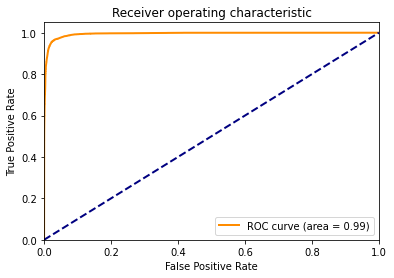

Threshold value is: 0.43524697
              precision    recall  f1-score   support

           0       1.00      0.97      0.98   1289169
           1       0.15      0.97      0.26      7506

    accuracy                           0.97   1296675
   macro avg       0.57      0.97      0.62   1296675
weighted avg       0.99      0.97      0.98   1296675

kappa 0.24811258967422156


In [ ]:
from sklearn.metrics import roc_curve, auc

y_prob = XGB.predict_proba(test_input)
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(2):
    fpr[i], tpr[i], thresholds = roc_curve(test_output, y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(test_output.ravel(), y_prob.argmax(axis=1))
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

plt.figure()
lw = 2
plt.plot(fpr[1], tpr[1], color='darkorange',  lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[1])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

# determine the best threshold
optimal_idx = np.argmax(tpr[1] - fpr[1])
optimal_threshold = thresholds[optimal_idx]
print("Threshold value is:", optimal_threshold)

y_prob_th = []
for i in y_prob:
  if( i[1] > optimal_threshold):
    y_prob_th.append(1)
  else:
    y_prob_th.append(0)

print(classification_report(test_output.values, y_prob_th))

from sklearn.metrics import cohen_kappa_score
kappa = cohen_kappa_score(test_output.values, y_prob_th)
print('kappa', kappa)

**Observation:**

- Here, it can be observed that the 'Random Under Sampling' method has produced better results.
- However, there is a problem with the Random Under sampling method. That is, while trimming the data to balance the classes in the target varibale, there is problem of losing valuable data.
- But, the results produced by the model with 'over sampling' can be observed to be equally efficient.
- And, ideally, the SMOTE method can be used, because it has produced a slightly better Recall.

In [ ]:
fileName = "creditCardFraud_model_new"
joblib.dump(rand_model, fileName)

['creditCardFraud_model_new']

In [ ]:
load_model = joblib.load('creditCardFraud_model_new')

In [ ]:
d={ 'trans_date_trans_time' : ['2019-01-02 01:06:37'],
    'merchant': ['fraud_Rutherford-Mertz'],
 'category':['grocery_pos'],
 'amt':['281.06'],
 'gender':['M'],
 'city':['Collettsville'],
 'state':['NC'],
 'job':['Soil scientist'],
 'dob':['1988-09-15'],
}

In [ ]:
d['trans_date'] = pd.DatetimeIndex(d['trans_date_trans_time']).date
d['trans_time'] = pd.DatetimeIndex(d['trans_date_trans_time']).time
d['trans_date'] =  pd.to_datetime(d['trans_date'])
del d['trans_date_trans_time']

d['dob'] = pd.to_datetime(d['dob'])
d['age'] = (pd.to_datetime('now') - d['dob'])/ np.timedelta64(1, 'Y')
d['age'] = d['age'].astype(int)
del d['dob']

d['merchant'] = label_encoder.fit_transform(d['merchant'])
d['job'] = label_encoder.fit_transform(d['job'])
d['state'] = label_encoder.fit_transform(d['state'])
d['category'] = label_encoder.fit_transform(d['category'])
d['city'] = label_encoder.fit_transform(d['city'])

if(d['gender']==['M']):
  d['gender']= 1
elif(d['gender']==['F']):
  d['gender']= 0

d['trans_date'] =  pd.to_datetime(d['trans_date'])
d['trans_date'] = d['trans_date'].map(dt.datetime.toordinal)
d['trans_time'] = pd.to_datetime(d['trans_time'],format='%H:%M:%S')
d['trans_time'] = 3600 * pd.DatetimeIndex(d['trans_time']).hour + 60 * pd.DatetimeIndex(d['trans_time']).minute + pd.DatetimeIndex(d['trans_time']).second



In [ ]:
d=pd.DataFrame(d)

In [ ]:
pred = load_model.predict(d)
result=pred.argmax()
print (result)
if result==1:
  print('it is fraud process classed by',result)
else:
  print('it is safe',result)

0
it is safe 0


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [ ]:
res =load_model.predict([[ '-0.3974012' , '-1.59138383', '-0.28918537', '-0.90920585', '-0.88268858',
        '-0.88460725',  '1.11217852', '-0.6484172' ,  '0.53109378', ' 0.33690725']])
if res==1:
  print('it is fraud process classed by',res)
else:
  print('it is safe',res)

it is safe [0]


In [ ]:
X_test,y_test


(array([[ 0.54809906,  0.96391193,  0.56986812, ...,  1.53555221,
         -1.66663588,  0.75387426],
        [ 0.14004105,  0.96391193, -0.01422837, ..., -1.51174923,
         -0.92061756,  0.12115746],
        [-0.30285117,  1.21944151,  5.35635301, ...,  2.51298852,
         -1.59270614,  1.35870642],
        ...,
        [-0.73579077, -1.59138383,  0.16890996, ...,  0.90309342,
          0.30930455, -0.04383007],
        [-1.18365932,  1.21944151,  6.09470737, ...,  1.4205597 ,
         -0.02673974,  1.54099464],
        [ 0.12013579,  1.21944151, -0.41699547, ..., -0.01684663,
          0.8536963 , -0.03467089]]), 7172     0
 3532     0
 8156     1
 14404    1
 379      0
         ..
 9699     1
 5771     0
 2422     0
 11287    1
 2732     0
 Name: is_fraud, Length: 4504, dtype: int64)